### import 불러오기

In [1]:
from konlpy.tag import Okt
import pandas as pd
from konlpy.tag import Okt,Komoran,Kkma
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import koreanize_matplotlib
import matplotlib.font_manager as fm
okt = Okt()
kom = Komoran()

In [10]:
data = pd.read_csv("new_indie.csv")
data

,title,artist,like_cnt,lyrics
0,비의 랩소디,임재현,"2,101",이젠 눈물 그쳐 나를 봐요\r\n우는 그대 더 아름다워\r\n내게 이 모습조차 더 ...
1,인사,범진,"3,048",돌아서는 너를 보며\r\n난 아무 말도 할 수 없었고\r\n슬퍼하기엔 짧았던\r\n...
2,숲,최유리,"5,251",난 저기 숲이 돼볼게\r\n너는 자그맣기만 한 언덕 위를\r\n오르며 날 바라볼래\...
3,사랑할 수밖에,볼빨간사춘기,"1,232",간지러웠어 널 보는 내 손이\r\n다 주고 싶었어 내 안에 남은 사랑까지\r\n지켜...
4,주저하는 연인들을 위해,잔나비,"22,555",나는 읽기 쉬운 마음이야\r\n당신도 스윽 훑고 가셔요\r\n달랠 길 없는 외로운 ...
...,...,...,...,...
692,연,오반(OVAN),22,우 어쩌면 우리는 Babe \r\n우리도 모르게 Babe \r\n서로를 계속 원했을...
693,살아간다,최유리,616,나는 조금만 더 올라가면 보일걸\r\n그 말을 굳게 믿은 채 다시 살아간다\r\n나...
694,Smoking Dreams,재지팩트(Jazzyfact),"3,969",i puff onetime and i puff twice \r\non and on ...
695,사랑했던 우리는 없어,리,12,뜨겁게 사랑했던 우리는 없어\r\n한없이 행복했던 우리는 없어\r\n노력해도 안되는...


In [13]:
data['lyrics'] = data['lyrics'].str.replace('\r\n', '', regex=False)


In [14]:
data

,title,artist,like_cnt,lyrics
0,비의 랩소디,임재현,"2,101",이젠 눈물 그쳐 나를 봐요우는 그대 더 아름다워내게 이 모습조차 더 남지 않도록그냥...
1,인사,범진,"3,048",돌아서는 너를 보며난 아무 말도 할 수 없었고슬퍼하기엔 짧았던나의 해는 저물어 갔네...
2,숲,최유리,"5,251",난 저기 숲이 돼볼게너는 자그맣기만 한 언덕 위를오르며 날 바라볼래나의 작은 마음 ...
3,사랑할 수밖에,볼빨간사춘기,"1,232",간지러웠어 널 보는 내 손이다 주고 싶었어 내 안에 남은 사랑까지지켜 주고 싶었어널...
4,주저하는 연인들을 위해,잔나비,"22,555",나는 읽기 쉬운 마음이야당신도 스윽 훑고 가셔요달랠 길 없는 외로운 마음 있지머물다...
...,...,...,...,...
692,연,오반(OVAN),22,우 어쩌면 우리는 Babe 우리도 모르게 Babe 서로를 계속 원했을까 아마언젠가부...
693,살아간다,최유리,616,나는 조금만 더 올라가면 보일걸그 말을 굳게 믿은 채 다시 살아간다나는 조그맣게 꿈...
694,Smoking Dreams,재지팩트(Jazzyfact),"3,969",i puff onetime and i puff twice on and on and ...
695,사랑했던 우리는 없어,리,12,뜨겁게 사랑했던 우리는 없어한없이 행복했던 우리는 없어노력해도 안되는답이없는 우리둘...


In [15]:
new_data = data["lyrics"].tolist()
new_data

['이젠 눈물 그쳐 나를 봐요우는 그대 더 아름다워내게 이 모습조차 더 남지 않도록그냥 고개 돌려요그저 미안한 마음뿐이죠그댈 위해 해줄 게 없어모두 이해할게요 그댈 아끼는 맘그분들도 같을 거란 걸한참 동안을 비틀거렸죠그댈 사랑했던 그만큼떠나가요 아주 먼 곳으로그대 소식 내게 올 수 없을 그만큼다 잊어요 내겐 마지막이 될사람도 모두 다 버려두고 갈게요나를 위해 많이 애썼단 걸알고 있죠 난 감사해요허나 이룰 수 없는 건 어쩔 수 없죠내가 용기 낼게요 이젠죽는 날까지 사랑한대도가질 수 없는 그대인걸떠나가요 아주 먼 곳으로그대 소식 내게 올 수 없을 그만큼다 잊어요 내겐 마지막이 될사람도 모두 다 버려두고 갈게요떠나가요 아주 먼 곳으로그대 소식 내게 올 수 없을 그만큼혹시라도 내가 그리울 때면세상에 내가 없다고 믿어요',
 '돌아서는 너를 보며난 아무 말도 할 수 없었고슬퍼하기엔 짧았던나의 해는 저물어 갔네지나치는 모진 기억이바람 따라 흩어질 때면아무 일도 없듯이 보내주려 해아픈 맘이 남지 않도록안녕 멀어지는 나의 하루야빛나지 못한 나의 별들아차마 아껴왔던 말 이제서야잘 지내 인사를 보낼 게떠나가는 너를 보며난 아무 말도 할 수 없었고슬퍼하기엔 짧았던나의 해는 저물어 갔네돌이킬 순 없는 추억이바람 따라 흩어질 때면아무 일도 없듯이 보내주려 해아픈 맘이 남지 않도록안녕 멀어지는 나의 하루야빛나지 못한 나의 별들아차마 아껴왔던 말 이제서야잘 지내 인사를 보낼 게잘 지내 인사를 보낼 게',
 '난 저기 숲이 돼볼게너는 자그맣기만 한 언덕 위를오르며 날 바라볼래나의 작은 마음 한구석이어도 돼길을 터 보일게 나를 베어도 돼 날 지나치지 마 날 보아줘나는 널 들을게 이젠 말해도 돼날 보며아 숲이 아닌 바다이던가 옆엔 높은 나무가 있길래하나라도 분명히 하고파 난 이제물에 가라앉으려나난 저기 숲이 돼볼래나의 옷이 다 눈물에 젖는대도아 바다라고 했던가그럼 내 눈물 모두 버릴 수 있나길을 터 보일게 나를 베어도 돼날 밀어내지 마 날 네게 둬 나는 내가 보여 난 항상 나를 봐내가 늘 이

In [18]:
lyrics_list = []

for i in new_data:
    pos_data = okt.pos((i))
    #print(pos_data)
    for word,pos in pos_data:
        if pos in ['Noun','Verb','Adjective']:
           lyrics_list.append(word)
    #print(text_list)
#print(lyrics_list)

In [19]:
from collections import Counter

counter = Counter(lyrics_list)

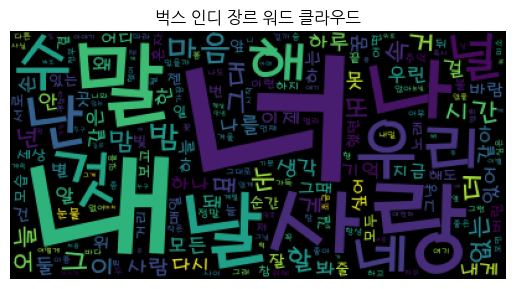

In [23]:
from wordcloud import WordCloud


wordcloud = WordCloud(
    font_path = "C:/Windows/Fonts/H2PORM.TTF"
).generate_from_frequencies(counter)

plt.imshow(wordcloud)
plt.title("벅스 인디 장르 워드 클라우드")
plt.axis("off")
plt.show()


### 멜론 알앤비 형태소 분석

In [2]:
df = pd.read_csv("melon_data.csv")
df

,title,artist,like_cnt,lyrics,release_date
0,너야,정인,158,어느 날부터 매일 아침에\n눈을 뜨는 순간부터 설레\n아마 내 삶에 네가 들어와 준...,2025.01.21
1,생각들,maji,117,대체로 불행한 날들\n힘 안 들이고 내뱉는 말들\n포근하며 차가운 밤들\n책상 위에...,2025.01.21
2,인생영화,이비(EB),59,When I’m with you babe 니가 웃을때\n마치 세상이 멈춘듯 해\nI...,2025.01.21
3,Goodbye (With Sam),DOF,10,In the break of night\nWonder what you did\nWh...,2025.01.21
4,GET OUT,그레씨 (GRACY),7,"너는 언제나 도망쳤지\n사랑은 커녕 책임조차 못졌지\n미련따윈 없어,\n난 이젠 알...",2025.01.21
...,...,...,...,...,...
1849,LIVE CLASSIC : paradise(with 롯데캐슬),Zion.T,830,I’m your sweet home\nThis where you belong\nYo...,2024.08.08
1850,파르페 (Parfait),김뮤즈 (Kimmuse),114,"난 무심코 내려다봤어\ncherry, cream, strawberry 가득 파르페를...",2024.08.08
1851,발그레,정가이 (와인루프),108,안녕 어제도 건넨\n인사를 수줍게 건네\n안부도 함께 물어\n오늘의 기분은 어때\n...,2024.08.08
1852,one by one,heyseunghey,85,사랑은 날 비껴가고\n나도 날 몰라보고\n어쩜 넌 그런 행운을 참 닮아있니?\n\n...,2024.08.08


In [ ]:
# # 가사 특수문자 등 제거 
# df[df['lyrics'].str.contains('[^ㄱ-ㅎ가-힣\s]+',regex=True)]
# df

,title,artist,like_cnt,lyrics,release_date
0,너야,정인,158,어느 날부터 매일 아침에\n눈을 뜨는 순간부터 설레\n아마 내 삶에 네가 들어와 준...,2025.01.21
1,생각들,maji,117,대체로 불행한 날들\n힘 안 들이고 내뱉는 말들\n포근하며 차가운 밤들\n책상 위에...,2025.01.21
2,인생영화,이비(EB),59,When I’m with you babe 니가 웃을때\n마치 세상이 멈춘듯 해\nI...,2025.01.21
3,Goodbye (With Sam),DOF,10,In the break of night\nWonder what you did\nWh...,2025.01.21
4,GET OUT,그레씨 (GRACY),7,"너는 언제나 도망쳤지\n사랑은 커녕 책임조차 못졌지\n미련따윈 없어,\n난 이젠 알...",2025.01.21
...,...,...,...,...,...
1849,LIVE CLASSIC : paradise(with 롯데캐슬),Zion.T,830,I’m your sweet home\nThis where you belong\nYo...,2024.08.08
1850,파르페 (Parfait),김뮤즈 (Kimmuse),114,"난 무심코 내려다봤어\ncherry, cream, strawberry 가득 파르페를...",2024.08.08
1851,발그레,정가이 (와인루프),108,안녕 어제도 건넨\n인사를 수줍게 건네\n안부도 함께 물어\n오늘의 기분은 어때\n...,2024.08.08
1852,one by one,heyseunghey,85,사랑은 날 비껴가고\n나도 날 몰라보고\n어쩜 넌 그런 행운을 참 닮아있니?\n\n...,2024.08.08


#### 가사 1개 가지고 품사 태깅 별 출력하는 거 테스트

In [14]:
first = df['lyrics'][1]
first

"대체로 불행한 날들\n힘 안 들이고 내뱉는 말들\n포근하며 차가운 밤들\n책상 위에 놓인 생각들\n내가 외면한 마음들과\n외면당한 마음의 주인이었던 나\n어디로 가나 알겠어, 난들?\n애초에 방향이라는 게 있었던가?\n\n창피하지, 일기를 펼쳐 보인다는 건\n더 솔직하려 해\n그럼 잠시나마 웃음이 지어지네\n아주 식어버린 웃음이\n마음 편히 가도 돼\n어차피 괜찮을 텐데\n그냥 내 생각들\n시시한 생각들\n\n여전히 여전해\n몇 번을 잠들었다 깨도\n여전히 여전해\n끝내 되돌아오는 이 생각들\n해가 뜨기 전에 난\n잠에 들 거야\nGood night\n\n아는 얼굴들 속의 나\n좋아 보이네\n두 발을 도움닫기하면\n하늘에 닿을 수 있었던\n햇볕이 길고 따갑던\n그 시절 반가운 너\n\n이젠 몰라볼 얼굴이 더 많지만\n다들 잘 지내\n이 어지러운 생각들 사이에서\n난 의외로 너희를 추억해\n수없이 많은 물음이,\n또 많은 울음이\n빽빽한 이 공책\n그 틈에서 끝내 여백을 찾아\n몇 자를 적어\n'모든 것은 여전해'\n\n여전히 여전해\n몇 번을 잠들었다 깨도\n여전히 여전해\n끝내 되돌아오는 이 생각들\n해가 뜨기 전에 난\n잠에 들 거야\nGood night\n\n잠에 들 거야\n끝내 되돌아오는 이 생각들\n해가 뜨기 전에 난...\nGood night!"

In [15]:
first1 = kom.pos(first)
first1

[('대체로', 'MAG'),
 ('불행', 'NNG'),
 ('하', 'XSV'),
 ('ㄴ', 'ETM'),
 ('날', 'NNG'),
 ('들', 'XSN'),
 ('힘', 'NNG'),
 ('안', 'MAG'),
 ('들이', 'VV'),
 ('고', 'EC'),
 ('내뱉', 'VV'),
 ('는', 'ETM'),
 ('말', 'NNG'),
 ('들', 'XSN'),
 ('포근', 'XR'),
 ('하', 'XSA'),
 ('며', 'EC'),
 ('차갑', 'VA'),
 ('ㄴ', 'ETM'),
 ('밤', 'NNG'),
 ('들', 'XSN'),
 ('책상', 'NNP'),
 ('위', 'NNG'),
 ('에', 'JKB'),
 ('놓이', 'VV'),
 ('ㄴ', 'ETM'),
 ('생각', 'NNG'),
 ('들', 'XSN'),
 ('내', 'NP'),
 ('가', 'JKS'),
 ('외면', 'NNG'),
 ('하', 'XSV'),
 ('ㄴ', 'ETM'),
 ('마음', 'NNG'),
 ('들', 'XSN'),
 ('과', 'JC'),
 ('외면', 'NNG'),
 ('당하', 'XSV'),
 ('ㄴ', 'ETM'),
 ('마음', 'NNG'),
 ('의', 'JKG'),
 ('주인', 'NNG'),
 ('이', 'VCP'),
 ('었', 'EP'),
 ('던', 'ETM'),
 ('나', 'NP'),
 ('어디', 'NP'),
 ('로', 'JKB'),
 ('가나', 'NNP'),
 ('알', 'VV'),
 ('겠', 'EP'),
 ('어', 'EC'),
 (',', 'SP'),
 ('나', 'VV'),
 ('ㄴ들', 'EF'),
 ('?', 'SF'),
 ('애초', 'NNG'),
 ('에', 'JKB'),
 ('방향', 'NNG'),
 ('이', 'VCP'),
 ('라는', 'ETM'),
 ('게', 'NNG'),
 ('있', 'VX'),
 ('었', 'EP'),
 ('던가', 'EF'),
 ('?', 'SF'),
 ('창피', 'N

In [16]:
# 품사 명사 
word_list = []

for word,pos in first1:
    if pos[0:1] == 'N':
        word_list.append(word)
print(word_list)

['불행', '날', '힘', '말', '밤', '책상', '위', '생각', '내', '외면', '마음', '외면', '마음', '주인', '나', '어디', '가나', '애초', '방향', '게', '창피', '일기', '건', '웃음', '웃음', '마음', '가도', '텐', '데', '내', '생각', '생각', '몇 번을', '생각', '해', '전', '잠', '거', '얼굴', '속', '나', '발', '도움닫기', '하늘', '수', '햇볕', '시절', '너', '이제', '얼굴', '다', '생각', '사이에서', '너희', '추억', '물음', '울음', '공책', '틈', '여백', '자', '것', '몇 번을', '생각', '해', '전', '잠', '거', '잠', '거', '생각', '해', '전', '나']


In [17]:
# 품사 동사,형용사, 부사  
verb_list = []

for word,pos in first1:
    if pos[0:1] == 'V'or pos[0:1] == 'M':
        verb_list.append(word)
print(verb_list)

['대체로', '안', '들이', '내뱉', '차갑', '놓이', '이', '알', '나', '이', '있', '펼치', '보이', '더', '하', '그럼', '잠시', '지', '지', '아주', '식', '버리', '편히', '되', '어차피', '괜찮', '그냥', '여전히', '잠들', '깨', '여전히', '끝내', '되돌아오', '이', '뜨', '나', '들', '알', '좋', '보이', '두', '닿', '있', '길', '따갑', '그', '반갑', '몰라보', '더', '많', '잘', '지내', '이', '어지럽', '나', '의외로', '수없이', '많', '또', '많', '이', '그', '끝내', '찾', '몇', '적', '모든', '여전히', '잠들', '깨', '여전히', '끝내', '되돌아오', '이', '뜨', '나', '들', '들', '끝내', '되돌아오', '이', '뜨']


In [18]:
# 품사 조사, 어미
josa_list = []
for word,pos in first1:
    if pos[0:1] == 'J' or pos[0:1] == 'E':
        josa_list.append(word)
print(josa_list)

['ㄴ', '고', '는', '며', 'ㄴ', '에', 'ㄴ', '가', 'ㄴ', '과', 'ㄴ', '의', '었', '던', '로', '겠', '어', 'ㄴ들', '에', '라는', '었', '던가', '지', '를', '어', 'ㄴ다는', '려', '아', '나마', '이', '어', '네', '어', 'ㄴ', '이', '어', '을', 'ㄴ', '아', '었', '다', '어도', '아', '는', '가', '기', '에', 'ㄴ', '에', 'ㄹ', '야', '는', '의', '아', '네', '을', '면', '에', '을', '었', '던', '이', '고', '던', 'ㄴ', 'ㄴ', 'ㄹ', '이', '지만', '어', 'ㄴ', 'ㄴ', '를', '아', '은', '이', '은', '이', 'ㄴ', '에서', '을', '아', '를', '어', '은', '아', '아', '었', '다', '어도', '아', '는', '가', '기', '에', 'ㄴ', '에', 'ㄹ', '야', '에', 'ㄹ', '야', '는', '가', '기', '에', 'ㄴ']


### 전체 가사 형태소 분석

In [3]:
text = df['lyrics'].tolist()
text

['어느 날부터 매일 아침에\n눈을 뜨는 순간부터 설레\n아마 내 삶에 네가 들어와 준 순간부턴가 봐\n밥 먹다가도 일하다가도\n머릿속엔 너만 가득해 이제 자다가도 널 생각해\n살아오며 만났던 그 누구와도 비교가 안 돼 그게\n\n바로 너야 내 모든 것\n다 주고 더 줘도 아깝지 않은\n사람 보고 있어도 보고 싶어지는\n사람이 너야 내 모든 것\n살아가는 동안에 나의 전부는 너야\n\n영원한 건 없다고들 말해\n그러다가 포기하고들 해\n그래 나도 별다를 것 없이 지내왔었는데\n슬프다가도 웃다가도\n아무 생각 없이 가만있다가도\n생각해도 너를 생각해\n살아오며 만났던 그 누구와도 비교가 안 돼 그게\n\n바로 너야 내 모든 것\n다 주고 더 줘도 아깝지 않은\n사람 내 사랑\n보고 있어도 보고 싶어지는\n사람이 너야 내 모든 것\n살아가는 동안에 나의 전부는\n\n단 하루도 단 한순간도\n살아갈 수 없어 네가 없이는\n이런 나의 마음이 얼만큼인지 네가 알아주지\n않더라도 괜찮아 난 그대로일 거니까\n\n너야 내 모든 것\n다 주고 더 줘도 아깝지 않은\n사람은 너야 내 모든 것\n살아가는 동안에 나의 전부는\n너야',
 "대체로 불행한 날들\n힘 안 들이고 내뱉는 말들\n포근하며 차가운 밤들\n책상 위에 놓인 생각들\n내가 외면한 마음들과\n외면당한 마음의 주인이었던 나\n어디로 가나 알겠어, 난들?\n애초에 방향이라는 게 있었던가?\n\n창피하지, 일기를 펼쳐 보인다는 건\n더 솔직하려 해\n그럼 잠시나마 웃음이 지어지네\n아주 식어버린 웃음이\n마음 편히 가도 돼\n어차피 괜찮을 텐데\n그냥 내 생각들\n시시한 생각들\n\n여전히 여전해\n몇 번을 잠들었다 깨도\n여전히 여전해\n끝내 되돌아오는 이 생각들\n해가 뜨기 전에 난\n잠에 들 거야\nGood night\n\n아는 얼굴들 속의 나\n좋아 보이네\n두 발을 도움닫기하면\n하늘에 닿을 수 있었던\n햇볕이 길고 따갑던\n그 시절 반가운 너\n\n이젠 몰라볼 얼굴이 더 많지만\n다들 잘 지내\n이 어지러운

In [4]:
# Komoran 기반의 품사 태깅 함수 
def pos_by_komoran (text) : 
    komoran = Komoran()
    ret_dt = []

    for line in text : 
        sentences = line.split("\n")
        for sentence in sentences: 
            if sentence.strip() != "":
                tagged_word = komoran.pos(sentence)
                for word, pos in tagged_word: 
                    ret_dt.append([word, pos])
    return  ret_dt

In [5]:
result = pos_by_komoran (text)
result

[['어느', 'MM'],
 ['날', 'NNG'],
 ['부터', 'JX'],
 ['매일', 'MAG'],
 ['아침', 'NNG'],
 ['에', 'JKB'],
 ['눈', 'NNG'],
 ['을', 'JKO'],
 ['뜨', 'VV'],
 ['는', 'ETM'],
 ['순간', 'NNG'],
 ['부터', 'JX'],
 ['설', 'NNB'],
 ['레', 'NNP'],
 ['아마', 'MAG'],
 ['내', 'NP'],
 ['삶', 'NNG'],
 ['에', 'JKB'],
 ['네', 'NP'],
 ['가', 'JKS'],
 ['들어오', 'VV'],
 ['아', 'EC'],
 ['주', 'VX'],
 ['ㄴ', 'ETM'],
 ['순간', 'NNG'],
 ['부터', 'JX'],
 ['ㄴ가', 'EC'],
 ['보', 'VV'],
 ['아', 'EC'],
 ['밥', 'NNG'],
 ['먹', 'VV'],
 ['다가', 'EC'],
 ['도', 'JX'],
 ['일', 'NNG'],
 ['하', 'XSV'],
 ['다가', 'EC'],
 ['도', 'JX'],
 ['머릿속', 'NNG'],
 ['에', 'JKB'],
 ['ㄴ', 'JX'],
 ['너', 'NP'],
 ['만', 'JX'],
 ['가득', 'MAG'],
 ['하', 'XSV'],
 ['아', 'EC'],
 ['이제', 'MAG'],
 ['자', 'VV'],
 ['다가', 'EC'],
 ['도', 'JX'],
 ['너', 'NP'],
 ['ㄹ', 'JKO'],
 ['생각', 'NNG'],
 ['하', 'XSV'],
 ['아', 'EC'],
 ['살아오', 'VV'],
 ['며', 'EC'],
 ['만나', 'VV'],
 ['았', 'EP'],
 ['던', 'ETM'],
 ['그', 'MM'],
 ['누구', 'NP'],
 ['와', 'JKB'],
 ['도', 'JX'],
 ['비교', 'NNG'],
 ['가', 'JKS'],
 ['안', 'MAG'],
 ['되', 'VV'],
 ['어'

In [6]:
len(result)

557991

#### 각 품사 별로 단어 저장

In [9]:
word_dict = {
    "N" : [],   # 체언
    "V" : [],   # 용언
    "M" : [],   # 수식언
    "J" : [],   # 관계언
    "E" : [],   # 어미
    "ETC" : []  # 그 외
}

In [13]:
for word, pos in result :
    #print(f"단어와 형태소 등장: {word, pos}")
    #print(f"형태소 0번째 추출: {pos[0]}")
    if pos[0] not in word_dict.keys():
        #print(f"{pos[0]}가 word_dict에 없어요")
        word_dict["ETC"].append((word))
    else :
        #print(f"{pos[0]}키에 '{word}'를 넣습니다.")
        word_dict[pos[0]].append((word))
    #print("="*50)

In [14]:
word_dict

{'N': ['날',
  '아침',
  '눈',
  '순간',
  '설',
  '레',
  '내',
  '삶',
  '네',
  '순간',
  '밥',
  '일',
  '머릿속',
  '너',
  '너',
  '생각',
  '누구',
  '비교',
  '그',
  '너',
  '내',
  '것',
  '사람',
  '사람',
  '너',
  '내',
  '것',
  '동안',
  '나',
  '전부',
  '너',
  '영원',
  '건',
  '말',
  '포기',
  '나',
  '것',
  '생각',
  '생각',
  '너',
  '생각',
  '누구',
  '비교',
  '그',
  '너',
  '내',
  '것',
  '사람',
  '내 사랑',
  '사람',
  '너',
  '내',
  '것',
  '동안',
  '나',
  '전부',
  '하루',
  '한순간',
  '수',
  '네',
  '나',
  '마음',
  '얼',
  '만큼',
  '네',
  '괜찮아',
  '너',
  '내',
  '것',
  '사람',
  '너',
  '내',
  '것',
  '동안',
  '나',
  '전부',
  '너',
  '불행',
  '날',
  '힘',
  '말',
  '밤',
  '책상',
  '위',
  '생각',
  '내',
  '외면',
  '마음',
  '외면',
  '마음',
  '주인',
  '나',
  '어디',
  '가나',
  '애초',
  '방향',
  '게',
  '창피',
  '일기',
  '건',
  '웃음',
  '웃음',
  '마음',
  '가도',
  '텐',
  '데',
  '내',
  '생각',
  '생각',
  '몇 번을',
  '생각',
  '해',
  '전',
  '잠',
  '거',
  '얼굴',
  '속',
  '나',
  '발',
  '도움닫기',
  '하늘',
  '수',
  '햇볕',
  '시절',
  '너',
  '이제',
  '얼굴',
  '다',
  '생각',
  '사이에서',
  '너희',
  '추

### GPU 사용

In [32]:
# 1. GPU 사용 여부 확인
import torch

## GPU 사용 가능 여부 확인
print(torch.cuda.is_available())        # True라면 GPU 사용 가능
print(torch.cuda.device_count())        # 사용 가능한 GPU 개수 출력
print(torch.cuda.get_device_name(0))    # 첫 번째 GPU 이름 출력

# 2. 디바이스 설정 (GPU가 없으면 CPU 사용)
device = torch.device("cuda")
print(f"Using device: {device}")

True
1
NVIDIA GeForce RTX 4070 Laptop GPU
Using device: cuda


### 문장 생성

In [26]:
import random

def generate_sentence(word_dict):
    # 기본 문법 구조
    grammar_patterns = [
        # 단문 구조
        ["N", "V"],                               # 주어 + 서술어
        ["M", "N", "V"],                          # 수식어 + 주어 + 서술어
        ["N", "M", "V", "J", "N"],                # 주어 + 수식어 + 서술어 + 관계어 + 목적어
        ["N", "V", "E"],                          # 주어 + 서술어 + 어미
        ["M", "N", "M", "V"],                     # 수식어 + 주어 + 수식어 + 서술어

        # 겹문장 구조 (두 절 이상 결합)
        ["N", "V", "E", "J", "N", "V", "E"],      # 주어 + 서술어 + 어미 + 관계어 + 주어 + 서술어 + 어미
        ["M", "N", "V", "J", "N", "M", "V"],      # 수식어 + 주어 + 서술어 + 관계어 + 주어 + 수식어 + 서술어
        ["N", "J", "N", "V", "E", "ETC", "N", "V"], # 주어 + 관계어 + 목적어 + 서술어 + 어미 + 그 외 + 주어 + 서술어

        # 안은문장 구조 (부사절/관계절 포함)
        ["N", "V", "J", "N", "M", "V"],           # 주어 + 서술어 + 관계어 + 주어 + 수식어 + 서술어
        ["M", "N", "V", "J", "N", "M", "V", "E"], # 수식어 + 주어 + 서술어 + 관계어 + 목적어 + 수식어 + 서술어 + 어미
        ["N", "J", "N", "J", "M", "N", "V"],      # 주어 + 관계어 + 목적어 + 관계어 + 수식어 + 목적어 + 서술어
        ["M", "N", "M", "V", "E", "J", "M", "N", "V"], # 수식어 + 주어 + 수식어 + 서술어 + 어미 + 관계어 + 수식어 + 목적어 + 서술어

        # 명사절 포함
        ["N", "J", "N", "V", "E", "J", "N", "V"], # 주어 + 관계어 + 명사절 + 서술어 + 어미 + 관계어 + 목적어 + 서술어
        ["N", "M", "N", "V", "J", "N", "V"],      # 주어 + 수식어 + 명사절 + 서술어 + 관계어 + 목적어 + 서술어

        # 복합 구조 (겹문장과 안은문장 혼합)
        ["N", "J", "N", "V", "E", "ETC", "M", "N", "V"], # 주어 + 관계어 + 명사절 + 서술어 + 어미 + 그 외 + 수식어 + 목적어 + 서술어
        ["M", "M", "N", "V", "J", "N", "M", "V"],        # 수식어 + 수식어 + 주어 + 서술어 + 관계어 + 명사절 + 수식어 + 서술어
    ]
    
    # 문법 구조 랜덤 선택
    pattern = random.choice(grammar_patterns)
    
   # 단어 선택 및 문자열 생성
    sentence = ""
    for pos in pattern:
        if word_dict.get(pos):  # 해당 품사에 단어가 있는지 확인
            word = random.choice(word_dict[pos])  # 랜덤 단어 선택
            sentence += word  # 문자열에 바로 추가
            sentence += " "  # 단어 간 공백 추가
        else:
            sentence += " "  # 품사에 단어가 없으면 공백만 추가

    return sentence.strip()  # 앞뒤 공백 제거

def generate_lyrics(word_dict, num_lines=16):
    # 16마디 문장 생성
    lyrics = ""
    for _ in range(num_lines):
        sentence = generate_sentence(word_dict)
        lyrics += sentence + "\n"  # 한 문장 생성 후 줄바꿈 추가
    return lyrics.strip()


In [31]:
# 16마디 문장 생성
lyrics = generate_lyrics(word_dict, num_lines=16)
print(lyrics)

먼저 영원히 마음 치 ㄹ 맘 지금 웃
내 밝 아서 ㄹ 나 멀 아
언젠가 폴리 말 을 바랄 이런 하
살랑 순간 네 길
우리 되
막상 진 헷갈리 만 꿈 그래서 좋
날 는 사이 이 지금 척 싶
듯 이 하루만 가 은지 도 길 없
눈 더 그동안 지 만 숨결 맞
동현 스며들 다면 이 생각 있 아
왜 척 느끼 을 사 더 있 아도
마음 이 쯤 주 게 like 거 기다리
선물 네 빅 나 에 내 주
너 떠나 을 듯 네 좋
또 참 우리 모르 를 나 잘 변하
공기 만 몸매 낳 ㄴ데 The 너 맑


In [33]:
def generate_lyrics(word_dict, num_lines=16, num_iterations=10000):
    # 결과 저장할 리스트
    all_lyrics = []

    # num_iterations 번 반복
    for _ in range(num_iterations):
        lyrics = ""
        for _ in range(num_lines):  # 16마디 생성
            sentence = generate_sentence(word_dict)
            lyrics += sentence + "\n"  # 한 문장 생성 후 줄바꿈 추가
        all_lyrics.append(lyrics.strip())  # 생성된 16마디를 리스트에 추가
    
    return all_lyrics

# 10000번 문장 생성
lyrics_list = generate_lyrics(word_dict, num_lines=16, num_iterations=10000)

# 예제: 첫 번째 생성된 가사 출력
print("Example Lyrics:\n")
print(lyrics_list[0:10])

# 필요하면 파일로 저장
with open("generated_lyrics.txt", "w", encoding="utf-8") as f:
    for lyrics in lyrics_list:
        f.write(lyrics + "\n\n")  # 각 가사 사이에 빈 줄 추가

Example Lyrics:

['그리워 만나\n폴리 에 내 나 았 Ooh 두 사람 많\n너에게 는 나 흘리 ㄹ while 그런 내 사라지\n끼 은 밤 만들 ㅁ ) 아무도 부르\n생각 서 고\n사랑 한 나 이 원망\n네 더 비치 도 A to Z\n함께 그 소리 싶 이 시 어느새 그러\n다시 너 맞추 가 마지막 전혀 않 지\n걸음 를 우우 열리 어 city 내 지\n하지만 너에게 다른 나오\n멍 도 내 를 이 온종일 뱉\n귀 로 기억 죽 어 everywhere 내일 않\n이제 마주 부서지 의 기억\n안와 야 시간 에 이 아무도 가\n공기 굳어지 는 내 그만큼 깍', '발 싶\n항상 파 끝내 는 사람 많이 펼쳐지\n같이 눈 이 멀 아요 에 아마도 순간을 영원히 어떻\n너 다 먹 을 하나\n이제 하 ㄴ 나 네 저물\n속 도 이별 똑같 고 tape 수 없\n언젠가 바랄 다 밝히\n나 이 너 틀리 ㄴ 을 서로 지나\n조금 거 밝\n모르나 에 바 가깝 는 와 누구 않\n밤 에 너 어떻 아 no 왜 하나 하\n그 방안 나 를 우리 정말로 오\n없이 날 이 지나가\n니 에 날 되 아 under 더 나 하\n집중 다시 두 과 내\n눈물 지', '영원히 너 내 야 우 전부 많 어\n장난감 다르 의 음 또 있\n나 로 속 귀찮 ㄴ made 모든 틈 빛나\n내 을 주변 없 어 이 몸 잊\n같이 이유 알\n나 좋\n답 않 라도\n사랑 의 사랑 들 었 ㄴ 줄 강하\n날 이미 하 과 눈\n내지 그러니 앞 갇히 만 혼자 단 보\n조금 영화 들\n다른 그날 콕콕 빠져나가\n건 생각나\n나 ㄹ 간 머무르 게 time 안 마음 안\n우우우우 생각 지 을 오 새 않\n마음 흐르 었', '언제나 세상 같이 하 어 를 또 혼자 이\n보고서 에게 숨결 부르 어 all 말 돌아가\n절대 가 비밀 있 어 가 오늘 뜨겁\n내 그 하 의 미래\n다 나 근데 데려가 을 이 또 평소 지\n맘 끝나 아도 만 밤하늘 빠지 ㄴ\n저 대전 네 쉬 어 도 많이 나 싶\n영혼 너무 걷 ㄹ 주진\n추억 야 그대 되 어 ca

In [ ]:
import random

# 최종 문장 만드는 함수 
def make_sentence_by_pattern (pattern): 
    sentence = ""
    match pattern:
        case 1 : 
            # 1. 주어 + 서술어 (N이/가 + V다) 예: "나는 간다."
            sentence = f"{random.choice(subject_words)} {random.choice(subject_words)} {random.choice(predicate_words)}."

        # 2. 주어 + 목적어 + 서술어 (N이/가 + N을/를 + V다) 예: "나는 밥을 먹는다."


        # 3. 주어 + 보어 + 서술어 (N이/가 + N이/가 + V다) 예: "그는 의사가 되었다."



        # 4. 주어 + 서술어 + 부사어 (N이/가 + Adv + V다) 예: "그녀는 천천히 걷는다."

 
        # 5. 주어 + 부사어 + 목적어 + 서술어 (N이/가 + Adv + N을/를 + V다) 예: "나는 오늘 친구를 만난다."


        # 6. 주어 + 서술어 + 보충어구 (전치사구) (N이/가 + N에서 + V고 있다) 예: "그는 공원에서 쉬고 있다."


        # 7. 주어 + 연결어 + 주어 + 서술어 (N이/가 + V고 + N은/는 + V다) 예: "나는 공부하고 친구는 운동한다."


        # 8. 주어 + 서술어 + 형용사 보충어 (N이/가 + N이/가 + Adj다) 예: "그녀는 기분이 좋다."


        # 9. 주어 + 목적어 + 보어 + 서술어 (N이/가 + N을/를 + N이라고 + V다) 예: "나는 그를 친구라고 부른다."


        # 10. 조건문 구조 (만약 ~면, ~한다) (만약 + N이/가 + V면 + N이/가 + N을/를 + V다) 예: "만약 비가 오면 나는 우산을 쓴다."
    
    return sentence

In [ ]:
# 겹문장과 안은문장으로 확장
sentence1 = f"{random.choice(NNG)}{random.choice(JKS)} {random.choice(VV)} {random.choice(NNG)} {random.choice(JC)}"  # 명사(NNG) + 조사(JKS) + 동사(VV) + 명사(NNG) + 조사(JC)
sentence2 = f"{random.choice(NNG)}{random.choice(JKS)} {random.choice(VA)} {random.choice(JX)} {random.choice(NNG)}"  # 명사(NNG) + 조사(JKS) + 형용사(VA) + 조사(JX) + 명사(NNG)
sentence3 = f"{random.choice(MAG)} {random.choice(VV)} {random.choice(NNG)} {random.choice(JKS)} {random.choice(VA)}"  # 부사(MAG) + 동사(VV) + 명사(NNG) + 조사(JKS) + 형용사(VA)
sentence4 = f"{random.choice(NNG)} {random.choice(JKS)} {random.choice(NNG)} {random.choice(JKO)} {random.choice(VV)} {random.choice(EC)}"  # 명사(NNG) + 조사(JKS) + 명사(NNG) + 조사(JKO) + 동사(VV) + 연결 어미(EC)
sentence5 = f"{random.choice(NNG)} {random.choice(JKS)} {random.choice(MAG)} {random.choice(VA)} {random.choice(EC)}"  # 명사(NNG) + 조사(JKS) + 부사(MAG) + 형용사(VA) + 연결 어미(EC)
sentence6 = f"{random.choice(NNG)} {random.choice(JKS)} {random.choice(NNG)} {random.choice(JC)} {random.choice(NNG)} {random.choice(EC)}"  # 명사(NNG) + 조사(JKS) + 명사(NNG) + 조사(JC) + 명사(NNG) + 연결 어미(EC)
sentence7 = f"{random.choice(MAG)} {random.choice(VV)} {random.choice(NNG)} {random.choice(JKO)} {random.choice(EC)}"  # 부사(MAG) + 동사(VV) + 명사(NNG) + 조사(JKO) + 연결 어미(EC)
sentence8 = f"{random.choice(NNG)} {random.choice(JKS)} {random.choice(NNG)} {random.choice(JKO)} {random.choice(VA)} {random.choice(EC)}"  # 명사(NNG) + 조사(JKS) + 명사(NNG) + 조사(JKO) + 형용사(VA) + 연결 어미(EC)
sentence9 = f"{random.choice(NNG)} {random.choice(JKS)} {random.choice(NNG)} {random.choice(JKO)} {random.choice(VV)} {random.choice(NNG)}"  # 명사(NNG) + 조사(JKS) + 명사(NNG) + 조사(JKO) + 동사(VV) + 명사(NNG)
sentence10 = f"{random.choice(NNG)} {random.choice(JKS)} {random.choice(VV)} {random.choice(NNG)} {random.choice(JC)} {random.choice(NNG)}"  # 명사(NNG) + 조사(JKS) + 동사(VV) + 명사(NNG) + 조사(JC) + 명사(NNG)

# 겹문장과 안은문장
sentence11 = f"{random.choice(NNG or VA)}{random.choice(JKS or JX)} {random.choice(NNG or VA)} {random.choice(MAG)}{random.choice(JKS or JX)} {random.choice(NNG or VA)}{random.choice(JKO or JC)} {random.choice(NNG)}{random.choice(JC)} {random.choice(NNG or VV)}{random.choice(NNG)} {random.choice(VV)}{random.choice(EC or VA)}"  # 겹문장
sentence12 = f"{random.choice(NNG)} {random.choice(JKS)} {random.choice(NNG)} {random.choice(JKO)} {random.choice(VV)} {random.choice(EC)} {random.choice(NNG)} {random.choice(JKS)} {random.choice(VA)} {random.choice(EF)}"  # 겹문장
sentence13 = f"{random.choice(NNG)} {random.choice(JKS)} {random.choice(VV)} {random.choice(EC)} ({random.choice(NNG)} {random.choice(JKS)} {random.choice(VV)})"  # 안은문장
sentence14 = f"{random.choice(MAG)} {random.choice(VV)} {random.choice(NNG)} {random.choice(JKS)} {random.choice(VA)} {random.choice(EC)} {random.choice(NNG)} {random.choice(JKS)} {random.choice(VV)} {random.choice(EF)}"  # 겹문장
sentence15 = f"{random.choice(NNG)} {random.choice(JKS)} {random.choice(NNG)} ({random.choice(VA)} {random.choice(EF)}) {random.choice(EC)}"  # 안은문장
sentence16 = f"{random.choice(NNG)} {random.choice(JKS)} {random.choice(NNG)} {random.choice(JC)} {random.choice(NNG)} {random.choice(JKS)} {random.choice(VV)} {random.choice(EC)}"  # 겹문장
sentence17 = f"{random.choice(MAG)} {random.choice(VV)} {random.choice(NNG)} {random.choice(JKO)} {random.choice(EC)} ({random.choice(NNG)} {random.choice(JKS)} {random.choice(VV)} {random.choice(EF)})"  # 안은문장
sentence18 = f"{random.choice(NNG)} {random.choice(JKS)} {random.choice(MAG)} {random.choice(VA)} {random.choice(EC)} {random.choice(NNG)} {random.choice(JKS)} {random.choice(NNG)} {random.choice(JKO)} {random.choice(VV)} {random.choice(EF)}"  # 겹문장
sentence19 = f"{random.choice(NNG)} {random.choice(JKS)} ({random.choice(NNG)} {random.choice(JKS)} {random.choice(VA)} {random.choice(EF)}) {random.choice(VV)} {random.choice(EC)}"  # 안은문장
sentence20 = f"{random.choice(NNG)} {random.choice(JKS)} {random.choice(VV)} {random.choice(EC)} {random.choice(NNG)} {random.choice(JKS)} {random.choice(VA)} {random.choice(EF)}"  # 겹문장